In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data=pd.read_excel("C:/Users/rakhi/Downloads/Telco-Customer-Churn.xlsx")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#checking for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null values in the data

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 1. Compare churn count with respect to gender.

In [6]:
data.groupby("Churn")["gender"].value_counts()

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Plot of Churn wrt gender'), Text(0, 0.5, 'No of customers')]

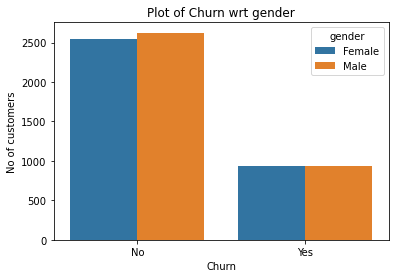

In [7]:
sns.countplot(data["Churn"],hue=data["gender"]).set(title="Plot of Churn wrt gender", ylabel="No of customers")

Churn count of females is 939 and males is 930. i.e. Almost similar count from both genders had left the company.

#### 2. Find out how many female senior citizens there in the dataset

In [8]:
#grouping rows of senior citizen alone from the data
a=data[data.SeniorCitizen==1].groupby("gender").SeniorCitizen.count()
a

gender
Female    568
Male      574
Name: SeniorCitizen, dtype: int64

<AxesSubplot:title={'center':'Plot of Senior Citizen vs Gender'}, xlabel='gender', ylabel='No of senior citizens'>

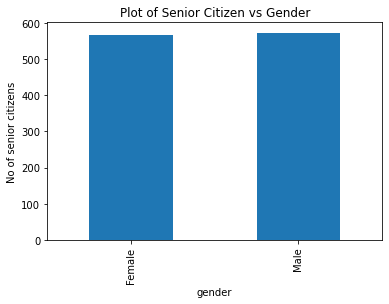

In [9]:
a.plot(kind="bar",ylabel="No of senior citizens",title="Plot of Senior Citizen vs Gender")

There are 568 female senior citizens in the dataset.

#### 3. Compare 'tenure' with 'Total Charges'

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Scatterplot of tenure and totalcharges')]

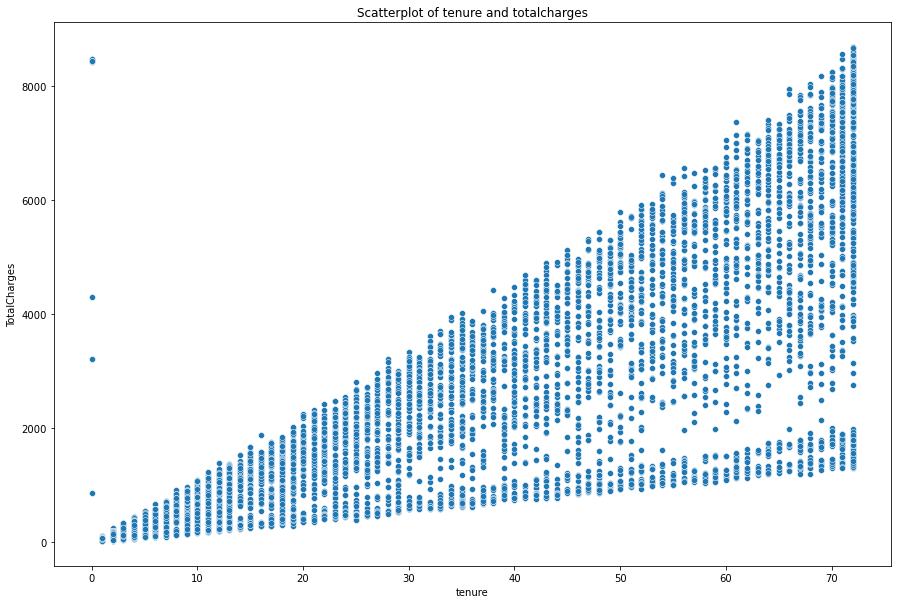

In [10]:
plt.figure(figsize=(15,10))
sns.scatterplot(data["tenure"],data["TotalCharges"]).set(title="Scatterplot of tenure and totalcharges")

Total charges are directly proportional to the tenure of the customer.

#### 4. Find out which contract is preferred by the senior citizen.

In [11]:
#grouping rows of senior citizen alone from the data
b=data[data.SeniorCitizen==1].groupby("Contract").SeniorCitizen.count()
b

Contract
Month-to-month    807
One year          190
Two year          145
Name: SeniorCitizen, dtype: int64

<AxesSubplot:title={'center':'Plot of preference of contract by senior citizen'}, xlabel='Contract', ylabel='Count'>

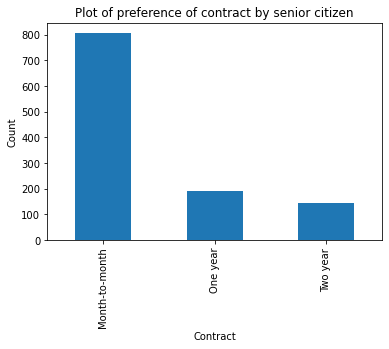

In [12]:
b.plot(kind="bar",ylabel="Count",title="Plot of preference of contract by senior citizen")

Most of the senior citizens pefer Month-to-month contract the most, followed by One year contract and the least prefered is Two year contract.

#### 5. Comment on your finds on Payment Method?

#### Payment method and gender

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Payment method w.r.t gender')]

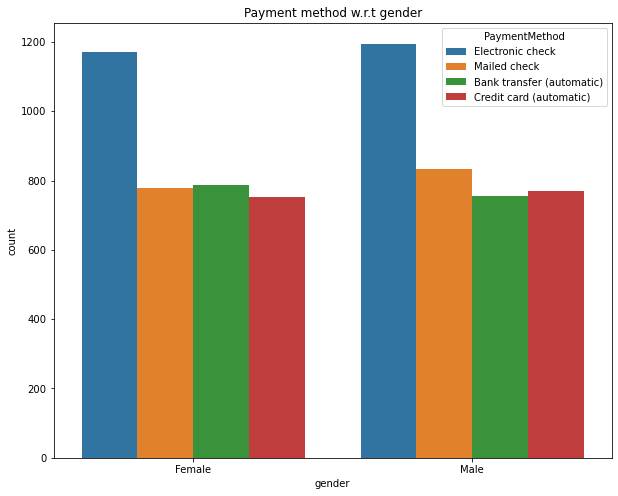

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data["gender"],hue=data["PaymentMethod"]).set(title="Payment method w.r.t gender")

1. Electronic check payment is most popular among male and female customers.
2.The least popular payment type among male customers is bank transfer method and among the female customers is Credit card method.

#### Payment method and contract

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Payment method w.r.t contract')]

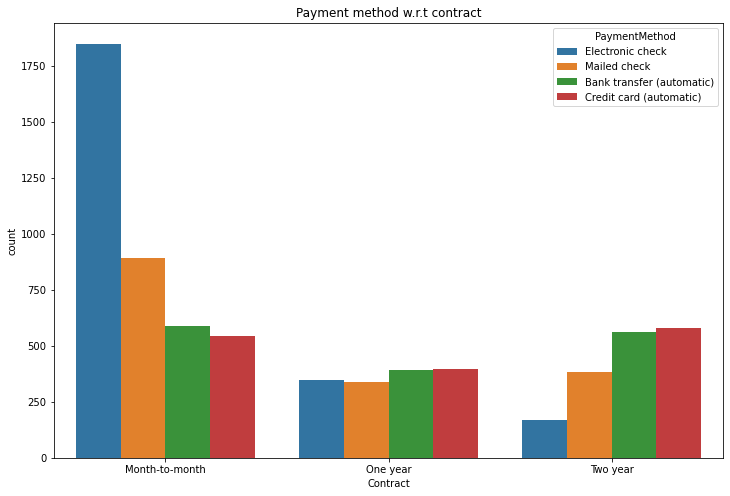

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(data["Contract"],hue=data["PaymentMethod"]).set(title="Payment method w.r.t contract")

Customers who prefer Month-to-month contract uses Electronic check payment method the most and credit card method the least.On the contrary, those who prefer One year and Two year contract uses credit card payment method the most.

#### Payment preference of Senior citizens and non senior citizens

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Payment preference by age')]

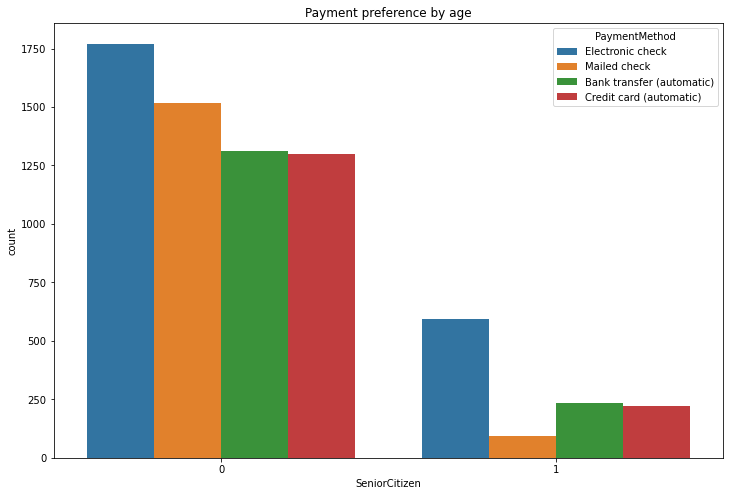

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(data["SeniorCitizen"],hue=data["PaymentMethod"]).set(title="Payment preference by age")

Electronic check method is most preferred payment type among both senior and non senior citizens.
Senior citizens prefer mailed check method the least.